# Samuel Vasco González

## TAREA 2. 

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

###Datos de la forma 
$$
y = f(\boldsymbol x, \theta) + \epsilon
$$

In [10]:
x = 2*np.random.rand(100,1)
y = 4+3*x+np.random.rand(100,1)

###Visualización de datos

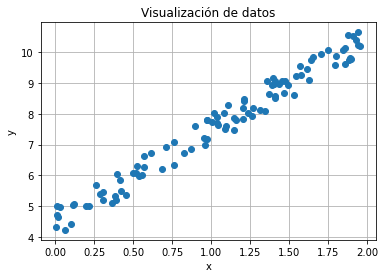

In [11]:
plt.plot(x,y,"o")
plt.title("Visualización de datos")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

Modelo de aprendizaje de regresión lineal $$
\boldsymbol{ \hat \theta} = (X^T X)^{-1} X^{T} \boldsymbol y
$$
Donde $\boldsymbol{ \hat \theta}$ contiene los parámetros óptimos del modelo y $X$ contiene como filas las observaciones y columnas las características.

In [12]:
X = np.c_[np.ones((100,1)), x]
theta_hat = np.linalg.inv( X.T @ X ) @ X.T @ y
print("Intercepto: {:.4} \n Pendiente: {:.4}".format(theta_hat[0][0],theta_hat[1][0]))

Intercepto: 4.491 
 Pendiente: 3.018


## Solución Tarea2: 

Ahora entrenaremos $1000$ instancias de la regresión lineal. Se calculará el promedio y la desviación estándar, luego se graficarán los histogramas y el diagrama de cajas para los parámetros.   

In [13]:
pendientes=[]
interceptos=[]

for i in range(1000):
  x = 2*np.random.rand(100,1)
  y = 4+3*x+np.random.rand(100,1)
  X = np.c_[np.ones((100,1)), x]
  theta_hat = np.linalg.inv( X.T @ X ) @ X.T @ y
  interceptos.append(theta_hat[0][0])
  pendientes.append(theta_hat[1][0])

pendientes=np.array(pendientes)
interceptos=np.array(interceptos)

prom_pend=np.mean(pendientes)
desv_pend=np.std(pendientes)
prom_interc=np.mean(interceptos)
desv_interc=np.std(interceptos)

print("Parámetro Pendiente: \n Promedio: {:.4} \n Desviación estándar: {:.4}".format(prom_pend,desv_pend))
print("Parámetro Intercepto: \n Promedio: {:.4} \n Desviación estándar: {:.4}".format(prom_interc,desv_interc))


Parámetro Pendiente: 
 Promedio: 3.001 
 Desviación estándar: 0.05013
Parámetro Intercepto: 
 Promedio: 4.499 
 Desviación estándar: 0.05883


Luego de repetir el procedimiento $1000$ veces y registrar la pendiente y el intercepto, y luego calcular el promedio y desviación estándar. 

Notamos que para el parámetro Pendiente la diferencia entre el valor original y el valor promediado es mínima, de aproximadamente $0.033$%, mientras que para el parámetro Intercepto tenemos una diferencia con el valor original de aproximadamente $12.47$%.

Respecto a la desviación estándar para cada parámetro, aproximadamente $0.05$ para Pendiente e Intercepto, podemos decir que los datos están muy poco desviados respecto al valor promedio, lo cual nos permite afirmar que los parámetros no fluctúan mucho respecto a repetidos usos del modelo a pesar de contar con un factor de aleatoriedad, lo cual es muy importante porque admite la reproducibilidad del modelo. 

Los resultados anteriores nos dan una buena confiabilidad en el modelo utilizado para realizar posteriores predicciones de los datos.

In [17]:
dataframe = np.c_[pendientes,interceptos]
df = pd.DataFrame(dataframe,columns=["Pendientes","Interceptos"])
df

,Pendientes,Interceptos
0,2.928699,4.594122
1,3.008724,4.477410
2,3.061629,4.415980
3,3.037385,4.465085
4,2.943273,4.589020
...,...,...
995,3.025833,4.446015
996,2.997662,4.536404
997,3.031845,4.471625
998,2.981815,4.513199


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6ed0c94f10>,
      dtype=object)

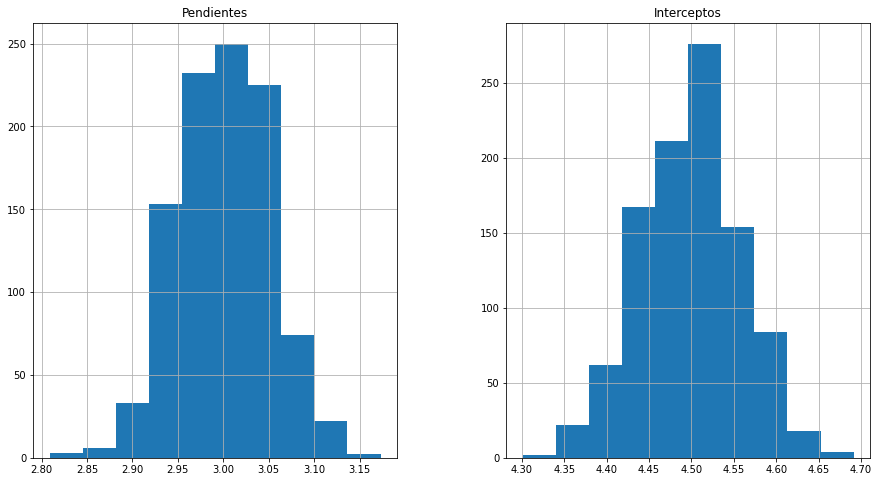

In [23]:
df.hist(figsize=(15,8))

La importancia de graficar los histogramas es para obtener una primera impresión general sobre la distribución de las variables. Para los parámetros Pendientes e Interceptos ambos histogramas presentan tendencia a una distribución normal, debido a que las barras se distribuyen normal y simétricamente alrededor de la media. 

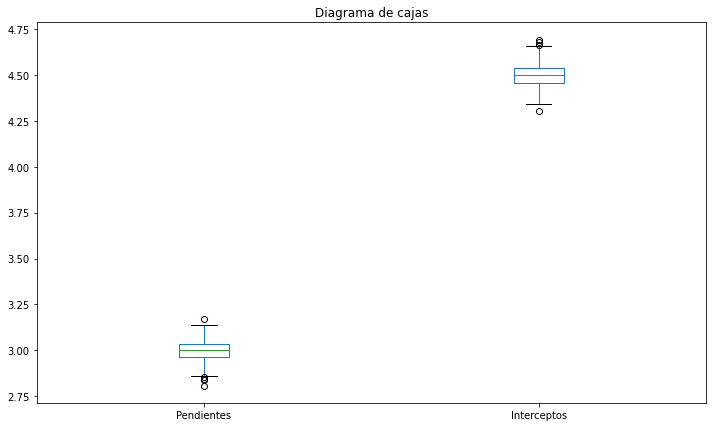

In [26]:
df.plot(kind="box",figsize=(12,7), title="Diagrama de cajas")

Del diagrama de cajas podemos notar que tanto el parámetro Pendientes como Interceptos tienen una caja achatada, debido a lo cercano que están los datos de la media, es decir poca dispersión de datos; además, la media para ambos parámetros también se ubica en el medio de la caja, esto se puede interpretar como que la distribución se encuentra de forma simétrica alrededor de la ubicación de la media; también se presentan algunos pocos outliers que están por fuera de los bigotes, esto demostrando la presencia del error en el cálculo de los parámetros.